This dataset is taken from https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019, which is realeased under CC0:Public Domain

![Amazon.jpg](attachment:Amazon.jpg)

Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads
- Name
- Author
- User Rating
- Reviews
- Price
- Year
- Genre

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
books = pd.read_csv("C:/USER/Downloads/Food Samples")

FileNotFoundError: ignored

In [ ]:
books.head()

Identify the features that are categorical
- Name , Author and Genre are categorical features in our dataset

Numerical features
- Rating, Review, Price, Year

In [ ]:
books.shape

There are 550 rows and 7 columns in our dataset

In [ ]:
books.dtypes

Name , Author and Genre are objects where as Reviews, Price, Year are integars and User Rating is float 

In [ ]:
books.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [ ]:
books.describe(include = ['O'])

,Name,Author,Genre
count,550,550,550
unique,351,248,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,12,310


There are 550 records of books in our dataset, out of which 351 are unique. Similary, there are 550 Authors and 248 of them are unique. This show we have duplicates in pur dataset

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
Name           550 non-null object
Author         550 non-null object
User Rating    550 non-null float64
Reviews        550 non-null int64
Price          550 non-null int64
Year           550 non-null int64
Genre          550 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 23.7+ KB


In [ ]:
books.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

There are no null values in out dataset

In [ ]:
duplicatedbooks = books[books.duplicated()]
print(duplicatedbooks)

Empty DataFrame
Columns: [Name, Author, User Rating, Reviews, Price, Year, Genre]
Index: []


In [ ]:
duplicatedbooks = books[books[['Name','Author']].duplicated()]
print(duplicatedbooks)

                                                  Name            Author  \
10                           A Man Called Ove: A Novel   Fredrik Backman   
21                         All the Light We Cannot See     Anthony Doerr   
33                                            Becoming    Michelle Obama   
36                            Between the World and Me  Ta-Nehisi Coates   
41            Brown Bear, Brown Bear, What Do You See?   Bill Martin Jr.   
..                                                 ...               ...   
543                                             Wonder     R. J. Palacio   
544                                             Wonder     R. J. Palacio   
547  You Are a Badass: How to Stop Doubting Your Gr...       Jen Sincero   
548  You Are a Badass: How to Stop Doubting Your Gr...       Jen Sincero   
549  You Are a Badass: How to Stop Doubting Your Gr...       Jen Sincero   

     User Rating  Reviews  Price  Year        Genre  
10           4.6    23848      8 

We do have duplicates in Name and Author columns but the year for each row is different. This means the same book was bestseller multiple times, thus we cannot remove these duplicates

In [ ]:
books.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

In [ ]:
books['Year'].value_counts()

2019    50
2018    50
2017    50
2016    50
2015    50
2014    50
2013    50
2012    50
2011    50
2010    50
2009    50
Name: Year, dtype: int64

(5.0, 0)

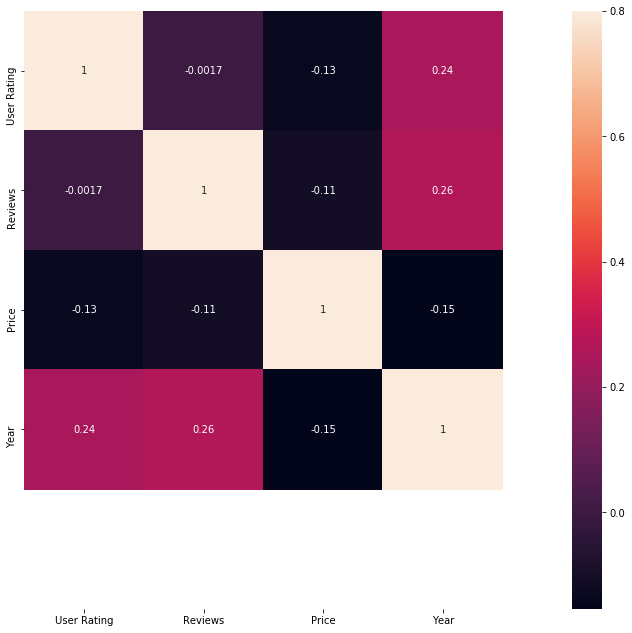

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,11))
ax = sns.heatmap(books.corr(), vmax=0.8, square=True, annot_kws={'size':10}, annot=True)
ax.get_ylim()
(5.5, 0.5)
ax.set_ylim(5.0, 0) 

In [ ]:
#Fiction vs Non-fiction books
fiction = len(books[books['Genre'] == 'Fiction'])
non_fiction = len(books[books['Genre'] == 'Non Fiction'])
print('The number of best seller fiction books are :  %i (%.1f%%)'% (fiction, (fiction)/len(books)*100 ))
print('The number of best seller non-fiction books are: %i (%.1f%%)'% (non_fiction,(non_fiction)/len(books)*100 ) )

The number of best seller fiction books are :  240 (43.6%)
The number of best seller non-fiction books are: 310 (56.4%)


It is evident that non-fiction books are more popular as compared to fictional books

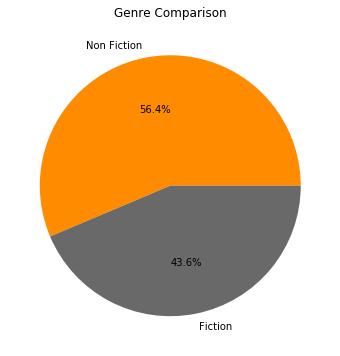

In [ ]:
#Pie-chart
value = books['Genre'].value_counts()
my_colors = ['darkorange', 'dimgrey']
my_explode = (0, 0.1, 0)
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(value.values,labels=value.index,autopct='%1.1f%%', colors=my_colors)
plt.title('Genre Comparison')
plt.show()

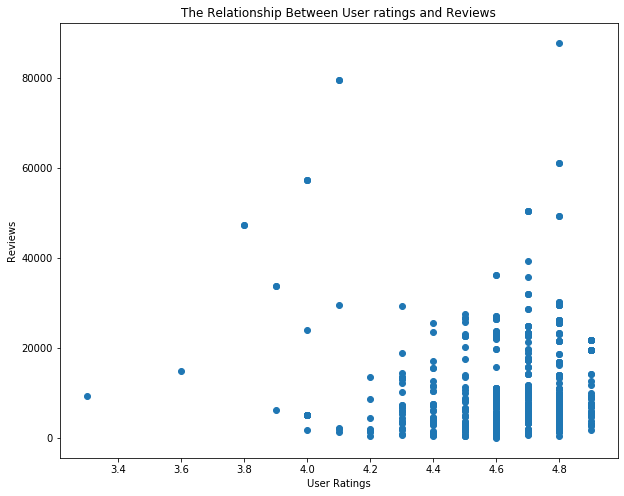

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(books['User Rating'],books['Reviews'], label = "User Rating")
plt.xlabel("User Ratings")
plt.ylabel("Reviews")
plt.title("The Relationship Between User ratings and Reviews")
plt.show()

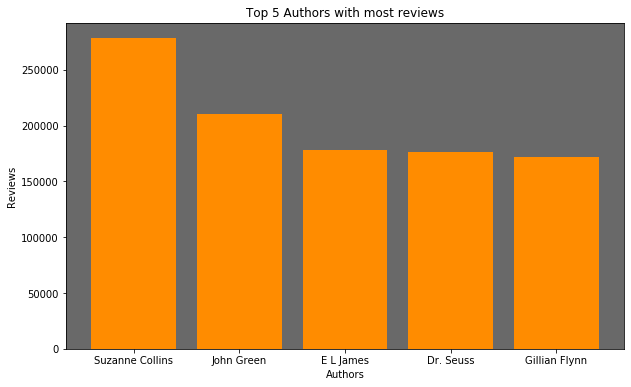

In [ ]:
#Top 5 Authors with most reviews
book=books.groupby('Author')['Reviews'].agg([sum]).sort_values(by=('sum'),ascending=False).reset_index().head(5)

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_facecolor('dimgrey')
ax1.bar(book['Author'],book['sum'],color='darkorange')
plt.title('Top 5 Authors with most reviews')
plt.xlabel("Authors")
plt.ylabel("Reviews")
plt.show()

The above graph shows Suzanne Collins, John Green are the top 2 authors who has got the most reviews

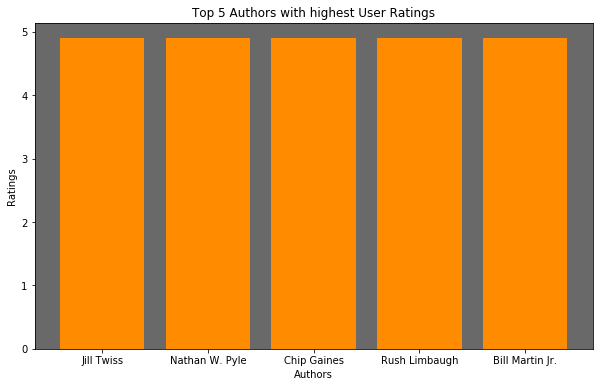

In [ ]:
#Top 5 Authors with highest ratings (on average)
book=books.groupby('Author')['User Rating'].agg(['mean']).sort_values(by=('mean'),ascending=False).reset_index().head(5)

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_facecolor('dimgrey')
ax1.bar(book['Author'],book['mean'],color='darkorange')
plt.title('Top 5 Authors with highest User Ratings')
plt.xlabel("Authors")
plt.ylabel("Ratings")
plt.show()

The above graph shows Top 5 Authors with respect to highest ratings 

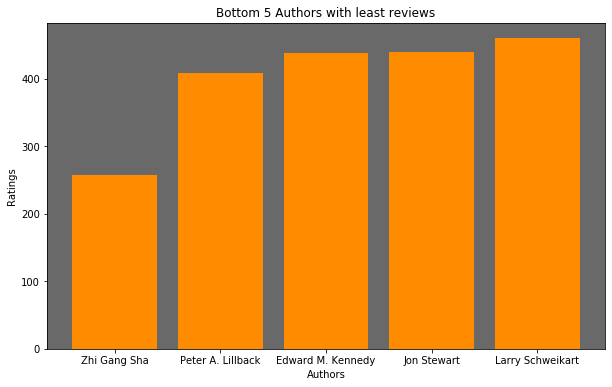

In [ ]:
#Bottom 5 Authors with least reviews
book=books.groupby('Author')['Reviews'].agg([sum]).sort_values(by=('sum'),ascending=True).reset_index().head(5)

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_facecolor('dimgrey')
ax1.bar(book['Author'],book['sum'],color='darkorange')
plt.title('Bottom 5 Authors with least reviews')
plt.xlabel("Authors")
plt.ylabel("Ratings")
plt.show()

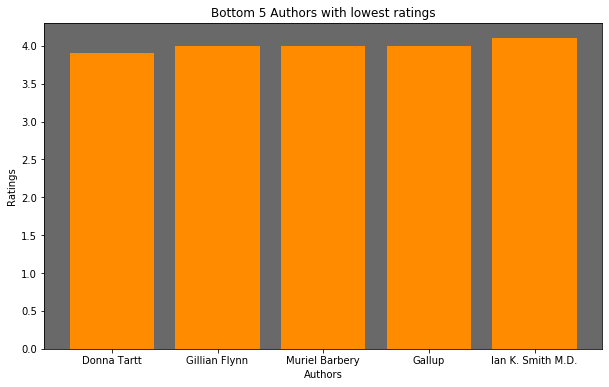

In [ ]:
#Top 5 Authors with highest ratings (on average)
book=books.groupby('Author')['User Rating'].agg(['mean']).sort_values(by=('mean'),ascending=True).reset_index().head(5)

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_facecolor('dimgrey')
ax1.bar(book['Author'],book['mean'],color='darkorange')
plt.title('Bottom 5 Authors with lowest ratings')
plt.xlabel("Authors")
plt.ylabel("Ratings")
plt.show()

Here, we see an interesting fact. Gillian Flynn is in the top 5 authors with the most reviews, however in terms of ratings he lies in the bottom 5

In [ ]:
book_author = books['Author'].value_counts().reset_index().head(10)
print(book_author)

                                index  Author
0                         Jeff Kinney      12
1                        Rick Riordan      11
2                        Gary Chapman      11
3                     Suzanne Collins      11
4  American Psychological Association      10
5                           Dr. Seuss       9
6                              Gallup       9
7                         Rob Elliott       8
8                     Stephenie Meyer       7
9                          Dav Pilkey       7


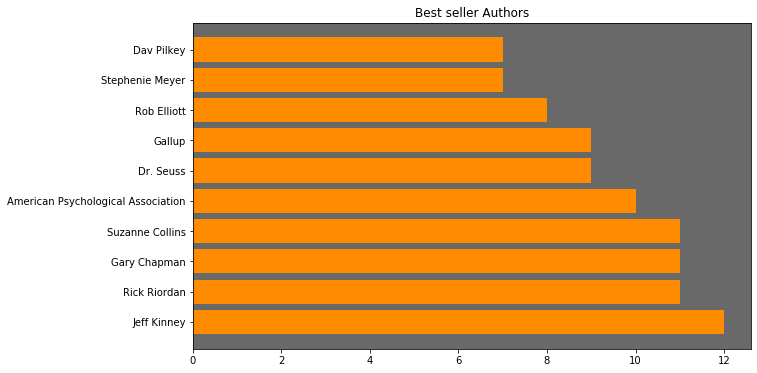

In [ ]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_facecolor('dimgrey')
ax1.barh(book_author['index'],book_author['Author'],color='darkorange')
plt.title('Best seller Authors')
plt.show()

Jeff Kinney is the best selling author with 12 best selling books in his record

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


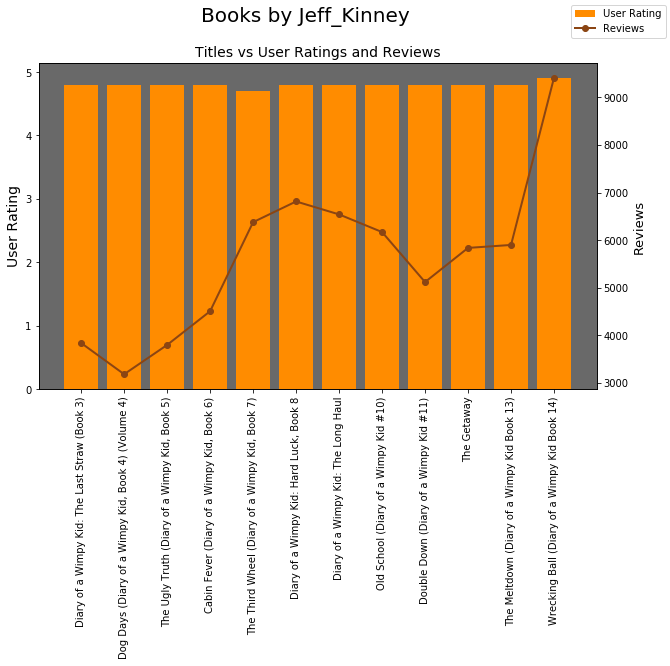

In [ ]:
Jeff_Kinney = books[books["Author"].isin(["Jeff Kinney"]) ]
Jeff_Kinney = Jeff_Kinney.sort_values(by="Year")

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_facecolor('dimgrey')
ax2 = ax1.twinx()
ax1.bar(Jeff_Kinney["Name"],Jeff_Kinney["User Rating"], color = "darkorange", label ="User Rating" )
ax1.set_ylabel("User Rating", fontsize =14)
ax1.tick_params(axis='x', labelrotation = 90)

ax2.plot(Jeff_Kinney["Name"],Jeff_Kinney["Reviews"],color = "saddlebrown",marker ="o",lw =2, label = "Reviews")
ax2.set_ylabel("Reviews", fontsize =13)

plt.suptitle("Books by Jeff_Kinney ", fontsize =20,y =1.01)
plt.title("Titles vs User Ratings and Reviews", fontsize =14)
fig.legend(loc="upper right")
fig.show()

In [ ]:
lowest_rated = books[books["User Rating"]==books["User Rating"].min()]
Highest_rated = books[books["User Rating"]==books["User Rating"].max()]

In [ ]:
lowest_rated
     

,Name,Author,User Rating,Reviews,Price,Year,Genre,Ratingband
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction,"(3.298, 3.62]"


The lowest rated book in the dataset is 'The Casual Vacancy' by J.K Rowling

In [ ]:
 Highest_rated

,Name,Author,User Rating,Reviews,Price,Year,Genre,Ratingband
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction,"(4.58, 4.9]"
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction,"(4.58, 4.9]"
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction,"(4.58, 4.9]"
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction,"(4.58, 4.9]"
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction,"(4.58, 4.9]"
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction,"(4.58, 4.9]"
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction,"(4.58, 4.9]"
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction,"(4.58, 4.9]"
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction,"(4.58, 4.9]"
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction,"(4.58, 4.9]"
